In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings

# Check event stats

In [27]:
fn = os.path.join('/scratch/cascade/UEH-daily/stats/wbgtmax30_STATS.json')

In [28]:
stats = pd.read_json(fn, orient = 'split')

In [ ]:
df.head()

In [ ]:
# Dehli 6955, Kolkata 9691

In [ ]:
def mk_data(df, id_):
    data = df[df['ID_HDC_G0'] == id_][['year','duration']].groupby('year').sum()
    pd.DataFrame(data.reset_index(inplace = True))
    
    return data

In [ ]:
dehli = mk_data(df, 6955)
kolkata = mk_data(df, 9691)

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.plot(dehli['year'], dehli['duration'], color = 'cornflowerblue', linewidth = 3)
plt.plot(kolkata['year'], kolkata['duration'], color = 'chocolate', linewidth = 3)
plt.legend(['Deli','Kolata'], fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('days/yr wbgt-max > 30°C', fontsize = 15)

In [ ]:
#### Args
DATA = 'wbgt30' # Always update WBGT32_1D, WBGT28_1D, HI406_1D HI406_2D & HI461_1D 
DATA_PATH = os.path.join('/scratch/cascade/UEH-daily/stats/')
FN_POP = os.path.join('/home/cascade/projects/UrbanHeat/data/interim/GHS-UCDB-Interp.csv')
FN_STATS = os.path.join(DATA_PATH, DATA+'_STATS.json')
FN_OUT = os.path.join(DATA_PATH, DATA+'_EXP.json') 

In [ ]:
FN_STATS

In [ ]:
FN_STATS = os.path.join('/scratch/cascade/UEH-daily/stats/wbgtmax30_STATS.json')

In [ ]:
stats = pd.read_json(FN_STATS, orient = 'split') # read in stats
df_pop = pd.read_csv(FN_POP) # read in interp population from GHS-UCDB

In [ ]:
len(np.unique(stats['ID_HDC_G0']))

In [ ]:
stats

In [ ]:
def tot_days(df):
    """ Calulates the total number of days per year when a heat threshold was met
    """
    df_out = df[['ID_HDC_G0','year','duration']].groupby(['ID_HDC_G0','year']).sum().reset_index()
    df_out.rename(columns={'duration':'tot_days'}, inplace=True)
    
    return df_out

In [ ]:
#### Args
DATA = 'wbgtmax30' # Always update WBGT32_1D, WBGT28_1D, HI406_1D HI406_2D & HI461_1D 
DATA_PATH = os.path.join('/scratch/cascade/UEH-daily/stats/')
FN_POP = os.path.join('/home/cascade/projects/UrbanHeat/data/interim/GHS-UCDB-Interp.csv')
FN_STATS = os.path.join(DATA_PATH, DATA+'_STATS.json')
FN_OUT = os.path.join(DATA_PATH, DATA+'_EXP.json') 

In [ ]:
df = pd.read_json(FN_OUT, orient = 'split')

In [ ]:
df

# Check TREND

In [4]:
fn = '/scratch/cascade/UEH-daily/stats/wbgtmax30_TREND_PDAYS05.json'

In [6]:
trend = pd.read_json(fn, orient = 'split')
len(trend)

6269

In [7]:
trend.head(2)

,ID_HDC_G0,coef_pdays,p_value_pdays,coef_heat,p_value_heat,coef_pop,p_value_pop,coef_totDays,p_value_totDays,coef_attrib,coef_attrib_norm,CTR_MN_NM,UC_NM_MN,GCPNT_LAT,GCPNT_LON,region,sub-region,intermediate-region,P1983,P2016
22,52,101604.735492,0.0007,28022.279616,0.0764,73582.455875,0.0,0.280825,0.0764,0.448406,0.780879,Mexico,La Paz [MEX],24.117658,-110.310119,Americas,Latin America and the Caribbean,Central America,99785.538677,249632.317993
26,57,531741.922626,0.0002,-36648.428326,0.6062,568390.350952,0.0,-0.084798,0.6062,1.137843,0.876066,Mexico,Mexicali [MEX]; Calexico [USA],32.625439,-115.447658,Americas,Latin America and the Caribbean,Central America,432187.321425,805239.718513


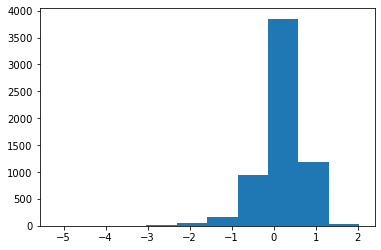

In [9]:
plt.hist(trend['coef_attrib']);

(array([2.000e+00, 1.000e+00, 5.000e+00, 1.500e+01, 5.300e+01, 1.680e+02,
        9.510e+02, 3.851e+03, 1.188e+03, 3.500e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

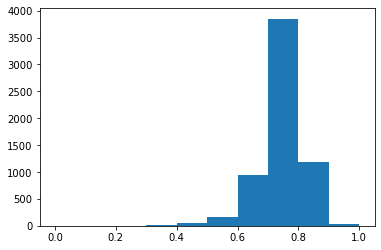

In [11]:
plt.hist(trend['coef_attrib_norm'])

In [58]:
df = trend[['ID_HDC_G0', 'coef_pdays', 'coef_pop', 'coef_heat']].copy()
df['pct-pop'] = trend['coef_pop'] / trend['coef_pdays']
df['pct-heat'] = trend['coef_heat'] / trend['coef_pdays']

In [61]:
df[df['pct-pop'] < 0]

,ID_HDC_G0,coef_pdays,coef_pop,coef_heat,pct-pop,pct-heat
213,473,74030.666354,-1082.839874,75113.506228,-0.014627,1.014627
747,1470,83118.592288,-33902.715070,117021.307358,-0.407884,1.407884
790,1524,16138.986926,-2782.615273,18921.602199,-0.172416,1.172416
1029,1957,57701.795178,-3569.390252,61271.185430,-0.061859,1.061859
1618,2884,72436.453349,-2366.280178,74802.733527,-0.032667,1.032667
...,...,...,...,...,...,...
8646,12705,109308.233066,-15924.630508,125232.863574,-0.145686,1.145686
8652,12714,41453.918924,-7260.710170,48714.629094,-0.175151,1.175151
8658,12722,43297.456746,-1304.413264,44601.870010,-0.030127,1.030127
8676,12750,13307.875080,-5326.062165,18633.937245,-0.400219,1.400219


In [60]:
df[df['pct-heat'] > 1]

,ID_HDC_G0,coef_pdays,coef_pop,coef_heat,pct-pop,pct-heat
213,473,74030.666354,-1082.839874,75113.506228,-0.014627,1.014627
747,1470,83118.592288,-33902.715070,117021.307358,-0.407884,1.407884
790,1524,16138.986926,-2782.615273,18921.602199,-0.172416,1.172416
1029,1957,57701.795178,-3569.390252,61271.185430,-0.061859,1.061859
1618,2884,72436.453349,-2366.280178,74802.733527,-0.032667,1.032667
...,...,...,...,...,...,...
8646,12705,109308.233066,-15924.630508,125232.863574,-0.145686,1.145686
8652,12714,41453.918924,-7260.710170,48714.629094,-0.175151,1.175151
8658,12722,43297.456746,-1304.413264,44601.870010,-0.030127,1.030127
8676,12750,13307.875080,-5326.062165,18633.937245,-0.400219,1.400219


In [52]:
df[df['pct-pop'] > 1]

,ID_HDC_G0,coef_attrib,pct-pop
26,57,1.137843,1.068921
39,72,1.041146,1.020573
45,79,1.357328,1.178664
50,85,1.164690,1.082345
1800,3251,1.025003,1.012501
...,...,...,...
8196,12166,1.007998,1.003999
8201,12171,1.016852,1.008426
8251,12232,1.014257,1.007129
8259,12242,1.020776,1.010388


In [26]:
trend[trend['ID_HDC_G0'] == 473]

,ID_HDC_G0,coef_pdays,p_value_pdays,coef_heat,p_value_heat,coef_pop,p_value_pop,coef_totDays,p_value_totDays,coef_attrib,coef_attrib_norm,CTR_MN_NM,UC_NM_MN,GCPNT_LAT,GCPNT_LON,region,sub-region,intermediate-region,P1983,P2016
213,473,74030.666354,0.0413,75113.506228,0.0397,-1082.839874,0.0124,0.039572,0.0397,-1.029254,0.576865,Cuba,La Habana (Havana) [CUB],23.071386,-82.351656,Americas,Latin America and the Caribbean,Caribbean,1.898139e+06,1.839558e+06


In [29]:
fn = os.path.join('/scratch/cascade/UEH-daily/stats/wbgtmax30_EXP.json')

In [31]:
exp = pd.read_json(fn, orient = 'split')

In [36]:
test = exp[exp['ID_HDC_G0'] == 12750].sort_values(by = 'year')

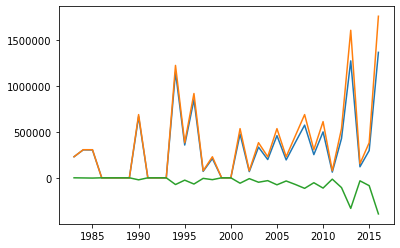

In [43]:
plt.plot(test['year'], test['people_days'])
plt.plot(test['year'], test['people_days_heat'])
plt.plot(test['year'], test['people_days_pop'])

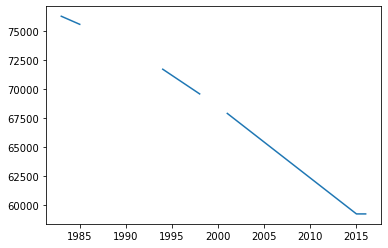

In [45]:
plt.plot(test['year'], test['P'])

In [46]:
test

,ID_HDC_G0,year,tot_days,P,P1983,P2016,people_days,people_days_heat,people_days_pop
237267,12750,1983,3,76272.119619,76272.119619,59225.665802,2.288164e+05,2.288164e+05,0.000000
237268,12750,1984,4,75923.594299,76272.119619,59225.665802,3.036944e+05,3.050885e+05,-1394.101278
237269,12750,1985,4,75575.068980,76272.119619,59225.665802,3.023003e+05,3.050885e+05,-2788.202555
59179,12750,1986,0,NaN,76272.119619,59225.665802,0.000000e+00,0.000000e+00,0.000000
59180,12750,1987,0,NaN,76272.119619,59225.665802,0.000000e+00,0.000000e+00,0.000000
59181,12750,1988,0,NaN,76272.119619,59225.665802,0.000000e+00,0.000000e+00,0.000000
59182,12750,1989,0,NaN,76272.119619,59225.665802,0.000000e+00,0.000000e+00,0.000000
237270,12750,1990,9,73832.442383,76272.119619,59225.665802,6.644920e+05,6.864491e+05,-21957.095123
59183,12750,1991,0,NaN,76272.119619,59225.665802,0.000000e+00,0.000000e+00,0.000000
59184,12750,1992,0,NaN,76272.119619,59225.665802,0.000000e+00,0.000000e+00,0.000000


(-0.5, 1.5)

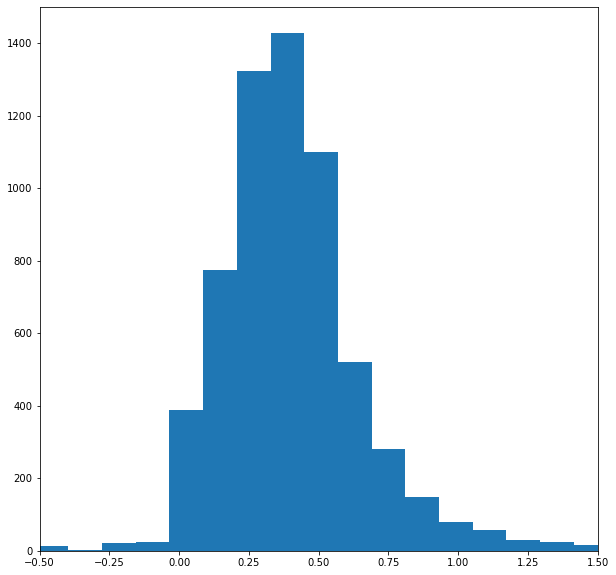

In [70]:
fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.hist(df['pct-heat'], bins = 30);
plt.xlim([-0.5,1.5])

## coef attrib is not working, check it

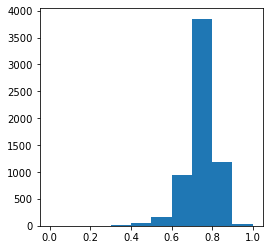

In [12]:
data = trend['coef_attrib_norm'].values
fig = plt.gcf()
fig.set_size_inches(4, 4)

plt.hist(data);

In [ ]:
test = trend#.iloc[:1000,:]

In [ ]:
coef_attrib = (trend['coef_pop'] - trend['coef_heat']) / (trend['coef_pop'] + trend['coef_heat'])

In [ ]:
fig = plt.gcf()
fig.set_size_inches(4, 4)

plt.hist(coef_attrib);
plt.xlim([-5,5])

In [ ]:
plt.hist(trend['coef_attrib'])
plt.xlim([-5,5])

In [ ]:
df = pd.DataFrame()
df['coef_attrib'] = coef_attrib
norm = df['coef_attrib']
df['coef_attrib_norm'] = (norm-min(norm))/(max(norm)-min(norm))

In [ ]:
df

In [ ]:
fig = plt.gcf()
fig.set_size_inches(4, 4)

plt.hist(df['coef_attrib_norm']);

In [ ]:
df['norm_old'] = trend['coef_attrib_norm']
df['coef_attrib_old'] = trend['coef_attrib']

In [ ]:
df.head()

In [ ]:
min(df['coef_attrib'])

In [ ]:
test = trend

In [ ]:
# attrib coef --- creates range index of heat vs. population as a driver of total pdays increase
out = pd.DataFrame()
out['coef_attrib'] = (test['coef_pop'] - test['coef_heat']) / (test['coef_pop'] + test['coef_heat'])  

# normalize coef of attribution 0 to 1
norm = test['coef_attrib']
out['coef_attrib_norm'] = (norm-min(norm))/(max(norm)-min(norm))

In [ ]:
out

In [ ]:
plt.hist(out['coef_attrib_norm'])

# WBGT

In [ ]:
# Functions
def c_to_f(C):
    "Convert HI C to F"
    return 1.8 * C + 32

def F_to_C(Tmax_F):
    "Function converts temp in F to C"
    Tmax_C = (Tmax_F - 32) * (5/9)
    
    return Tmax_C

def hi_to_wbgt(HI):
    """ Convert HI to WBGT using emprical relationship from Bernard and Iheanacho 2015
    WBGT [◦C] = −0.0034 HI2 + 0.96 HI−34; for HI [◦F]
    Args:
        HI = heat index as an array
    """
    
    WBGT = -0.0034*HI**2 + 0.96*HI - 34
    
    return WBGT

In [ ]:
hi_to_wbgt(105)

In [ ]:
c_to_f(29)